In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
import pathlib

In [3]:
from collections import OrderedDict as OD

In [4]:
import numpy as np 
import pandas as pd 
import xarray as xr

### read the ONI from the CPC 

In [5]:
url = "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"

In [6]:
oni = pd.read_table(url,sep=r'\s+', engine='python')

In [7]:
oni = oni.loc[oni.YR > 1998,:]

In [8]:
oni.head()

,SEAS,YR,TOTAL,ANOM
588,DJF,1999,25.08,-1.55
589,JFM,1999,25.55,-1.30
590,FMA,1999,26.17,-1.07
591,MAM,1999,26.62,-0.98
592,AMJ,1999,26.68,-1.02


In [9]:
oni.tail()

,SEAS,YR,TOTAL,ANOM
834,JJA,2019,27.57,0.30
835,JAS,2019,27.10,0.11
836,ASO,2019,26.95,0.13
837,SON,2019,27.06,0.29
838,OND,2019,27.18,0.46


In [10]:
year = 2018

In [11]:
season = 'OND'

In [12]:
months = [10, 12]

In [13]:
oni_seas = oni.loc[oni.SEAS == season]

In [14]:
oni_seas

,SEAS,YR,TOTAL,ANOM
598,OND,1999,25.16,-1.46
610,OND,2000,25.88,-0.75
622,OND,2001,26.37,-0.35
634,OND,2002,28.03,1.31
646,OND,2003,27.07,0.35
658,OND,2004,27.38,0.66
670,OND,2005,26.15,-0.57
682,OND,2006,27.62,0.90
694,OND,2007,25.17,-1.54
706,OND,2008,26.12,-0.60


In [15]:
ONI_threshold = 0.7

In [16]:
ninos = oni_seas.query('ANOM > {}'.format(ONI_threshold))

In [17]:
ninas = oni_seas.query('ANOM < {}'.format(-ONI_threshold))

In [18]:
neutral = oni_seas.query(f'{-ONI_threshold} <= ANOM <= {ONI_threshold}')

In [19]:
ninos

,SEAS,YR,TOTAL,ANOM
634,OND,2002,28.03,1.31
682,OND,2006,27.62,0.90
718,OND,2009,28.03,1.31
790,OND,2015,29.25,2.53
826,OND,2018,27.57,0.85


In [20]:
ninas

,SEAS,YR,TOTAL,ANOM
598,OND,1999,25.16,-1.46
610,OND,2000,25.88,-0.75
694,OND,2007,25.17,-1.54
730,OND,2010,25.03,-1.69
742,OND,2011,25.58,-1.14
802,OND,2016,26.01,-0.71
814,OND,2017,25.84,-0.88


In [21]:
neutral

,SEAS,YR,TOTAL,ANOM
622,OND,2001,26.37,-0.35
646,OND,2003,27.07,0.35
658,OND,2004,27.38,0.66
670,OND,2005,26.15,-0.57
706,OND,2008,26.12,-0.60
754,OND,2012,26.73,0.01
766,OND,2013,26.50,-0.22
778,OND,2014,27.31,0.59
838,OND,2019,27.18,0.46


## Now reads the CMORPH dataset 

**NOTE**: need to run 
    
    
```
cdo settunits,days cmorph_monthly.nc cmorph_monthly_jan1998-jan2020.nc

```

in the `CDO` environment  

in order to set the calendar so that it can be read by xarray 

In [22]:
dset = xr.open_dataset('../CMORPH/cmorph_monthly_jan1998-jan2020.nc')

In [23]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 265)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.7.1 (http:...
    history:                    Mon Jan 13 11:44:16 2020: cdo settunits,days ...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-01-10
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    CDO:                        Climate Data Operators version 1.9.7.1 (http:...

### restrict the domain to [110.,-30.,280.,20.] for tthe sector plots

In [24]:
dset = dset.sel(lat=slice(-40., 30.), lon=slice(150, 360 - 90))

### calculate the climatology 

In [25]:
clim = dset.sel(time=slice('1998','2018'))

In [26]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [27]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]
lon_labels = ['150E','180','150W','120W','90W']

### calculates the seasonal averages from the monthly means 

In [28]:
dset_seas = dset.rolling(time=3, min_periods=3).mean()

In [29]:
dset_seas

<xarray.Dataset>
Dimensions:  (lat: 140, lon: 240, time: 265)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15
  * lon      (lon) float32 150.25 150.75 151.25 151.75 ... 268.75 269.25 269.75
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 28.75 29.25 29.75
Data variables:
    prcp     (time, lat, lon) float32 nan nan nan ... 1.5302474 1.5843872

In [30]:
dset_seas.time.dt.month == months[1]

<xarray.DataArray 'month' (time: 265)>
array([False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False])
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2020-01-15

In [31]:
dset_seas = dset_seas.sel(time=(dset_seas.time.dt.month == months[1]))

In [32]:
ninos.YR.values

array([2002, 2006, 2009, 2015, 2018])

In [33]:
from datetime import datetime

In [34]:
time_index_ninos = [datetime(y, months[1], 15) for y in ninos.YR.values]
time_index_ninas = [datetime(y, months[1], 15) for y in ninas.YR.values]
time_index_neutral = [datetime(y, months[1], 15) for y in neutral.YR.values]

In [35]:
ninos_cmorph = dset_seas.sel(time=time_index_ninos)

In [36]:
ninas_cmorph = dset_seas.sel(time=time_index_ninas)

In [37]:
neutral_cmorph = dset_seas.sel(time=time_index_neutral)

In [38]:
lon_sectors = [150, 180, (360-150), (360-120), (360-90)]
lon_labels = ['150E','180','150W','120W','90W']

In [39]:
i = 0

In [40]:
sector_seas_ninos = ninos_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [41]:
sector_seas_ninas = ninas_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [42]:
sector_seas_neutral = neutral_cmorph.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [43]:
last_year = dset_seas.sel(time=f"{year}-{months[1]}")

In [44]:
last_year = last_year.sel(lon=slice(lon_sectors[i],lon_sectors[i+1])).mean('lon')

In [45]:
sector_seas_ninos = sector_seas_ninos.to_dataframe().unstack()

In [46]:
sector_seas_ninas = sector_seas_ninas.to_dataframe().unstack()

In [47]:
sector_seas_neutral = sector_seas_neutral.to_dataframe().unstack()

In [48]:
last_year = last_year.to_dataframe()

In [49]:
last_year = last_year.loc[:,'prcp']

In [50]:
last_year.index = last_year.index.droplevel(1)

In [51]:
last_year

lat
-39.75    2.104149
-39.25    1.979999
-38.75    2.093758
-38.25    2.086081
-37.75    2.264699
            ...   
 27.75    2.707287
 28.25    2.955035
 28.75    3.329372
 29.25    3.709698
 29.75    4.116752
Name: prcp, Length: 140, dtype: float32

In [93]:
sector_seas_ninas.index

Float64Index([-39.75, -39.25, -38.75, -38.25, -37.75, -37.25, -36.75, -36.25,
              -35.75, -35.25,
              ...
               25.25,  25.75,  26.25,  26.75,  27.25,  27.75,  28.25,  28.75,
               29.25,  29.75],
             dtype='float64', name='lat', length=140)

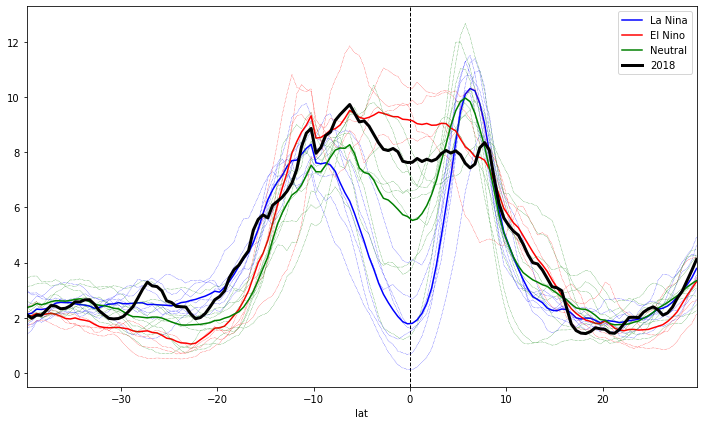

In [112]:
f, ax = plt.subplots(figsize=(12,7))

ax.axvline(0, lw=1, color='k', ls='--')

sector_seas_ninas.plot(ax=ax, color='b', legend=None, ls=':', lw=0.5)
LN, = ax.plot(sector_seas_ninas.index, sector_seas_ninas.mean(axis=1), color='b')

sector_seas_ninos.plot(ax=ax, color='r', legend=None, ls=':', lw=0.5)
EN, = ax.plot(sector_seas_ninos.index, sector_seas_ninos.mean(axis=1), color='r')

sector_seas_neutral.plot(ax=ax, color='g', legend=None, ls=':', lw=0.5)
N, = ax.plot(sector_seas_neutral.index, sector_seas_neutral.mean(axis=1), color='g')

LY, = ax.plot(last_year.index, last_year, color='k', lw=3)

ax.legend([LN, EN, N, LY], ['La Nina', 'El Nino', 'Neutral', str(year)])
